# Protocol for Annotation of Supracondylar Lysis {#sec-annotation-of-supracondylar-lysis}

Let's read the raw annotations and transform it to a CSV file.

In [1]:
import json

In [2]:
with open("../data-raw/raw-fore-fetlock-abnormality.json", "r") as _file:
    data = json.load(_file)

In [3]:
with open("../data-raw/labeling-data/raw-fore-fetlock-abnormality.csv", "w") as _file:
    _file.write(
        "image,task,original_width,original_height,rotation,keypoint_id,x,y,label,detail\n"
    )
    for image in data:
        for annotation in image["annotations"]:
            if len(annotation["result"]) == 0:
                _file.write(
                    "{},{},,,,,,,,\n".format(
                        image["data"]["image"],
                        annotation["task"],
                    )
                )
            else:
                for keypoint in annotation["result"]:
                    _file.write(
                        '{},{},{},{},{},{},{},{},"{}","{}"\n'.format(
                            image["data"]["image"],
                            annotation["task"],
                            keypoint["original_width"],
                            keypoint["original_height"],
                            keypoint["image_rotation"],
                            keypoint["id"],
                            keypoint["value"]["x"],
                            keypoint["value"]["y"],
                            "|".join(keypoint["value"]["keypointlabels"]),
                            "|".join(keypoint["meta"]["text"]),
                        )
                    )

Let's read the CSV file and standarise some information.

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("../data-raw/labeling-data/raw-fore-fetlock-abnormality.csv")

In [6]:
def detail2label(detail):
    if detail is np.nan:
        return "Absent of Abntormality"
    elif detail.find("fragment") != -1:
        return "Fragment"
    elif detail.find("chip") != -1:
        return "Fragment"
    elif detail.find("SCL") != -1:
        return "Supracondylar lysis"
    elif detail.find("SL") != -1:
        return "Supracondylar lysis"
    elif detail.find("scl") != -1:
        return "Supracondylar lysis"
    elif detail.find("OP") != -1:
        return "Osteophyte"
    elif detail.find("OCD") != -1:
        return "Osteochondritis dissecan"
    elif detail.find("PNB") != -1:
        return "Periosteal new bone"
    elif detail.find("PND") != -1:
        return "Periosteal new bone"
    elif detail.find("Periosteal") != -1:
        return "Periosteal new bone"
    elif detail.find("periosteal") != -1:
        return "Periosteal new bone"
    elif detail.find("new bone") != -1:
        return "Periosteal new bone"
    elif detail.find("cavitation") != -1:
        return "Cavitation"
    elif detail.find("Entheseophyte") != -1:
        return "Entheseophyte"
    elif detail.find("exostosis") != -1:
        return "Exostosis"
    elif detail.find("RL") != -1:
        return "Radiolucency"
    elif detail.find("radiolucency") != -1:
        return "Radiolucency"
    elif detail.find("radiolucent") != -1:
        return "Radiolucency"
    elif detail.find("lucency") != -1:
        return "Radiolucency"
    elif detail.find("RO") != -1:
        return "Radiopacity"
    elif detail.find("radiopacity") != -1:
        return "Radiopacity"
    elif detail.find("dirt") != -1:
        return "Dirt"
    else:
        return "Need manual check"


df["type"] = df["detail"].apply(detail2label)

In [7]:
def get_view(row):
    if row["x"] is np.nan or row["y"] is np.nan:
        return np.nan

    if row["x"] < 50 and row["y"] < 33:
        return "DP"
    elif row["x"] > 50 and row["y"] < 33:
        return "LM"
    elif row["x"] < 50 and row["y"] > 33 and row["y"] < 66:
        return "DLPMO"
    elif row["x"] > 50 and row["y"] > 33 and row["y"] < 66:
        return "DMPLO"
    elif row["x"] < 50 and row["y"] > 66:
        return "FLEXED DP"
    elif row["x"] > 50 and row["y"] > 66:
        return "FLEXED LM"
    else:
        return np.nan


df["view"] = df.apply(get_view, axis=1)

In [8]:
df["task_url"] = df["task"].apply(
    lambda task: f"http://localhost:8080/projects/51/data?task={task}"
)

In [9]:
df.to_csv("../data-raw/labeling-data/fore-fetlock-abnormality.csv", index=False)

Let's visualise the data.

In [10]:
import seaborn as sns

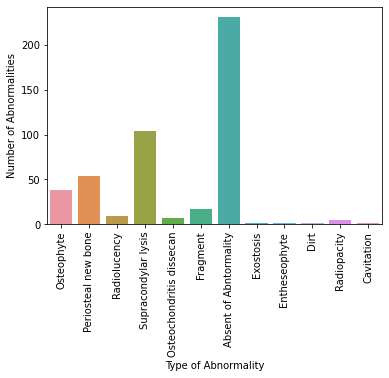

In [11]:
ax = sns.countplot(data=df, x="type")
_ = ax.set(xlabel="Type of Abnormality", ylabel="Number of Abnormalities")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

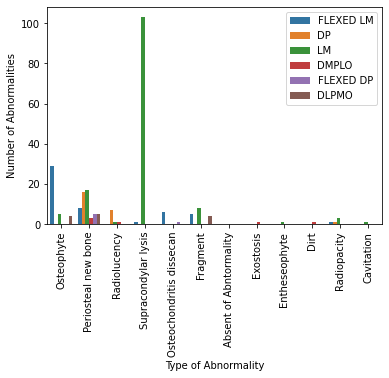

In [12]:
ax = sns.countplot(data=df, x="type", hue="view")
_ = ax.legend(loc=1)
_ = ax.set(xlabel="Type of Abnormality", ylabel="Number of Abnormalities")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

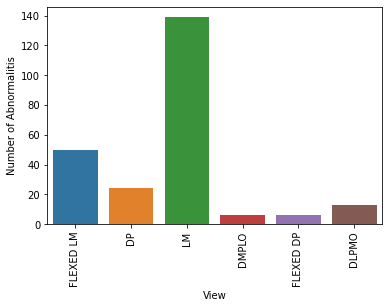

In [13]:
ax = sns.countplot(
    data=df,
    x="view",
)
_ = ax.set(xlabel="View", ylabel="Number of Abnormalitis")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

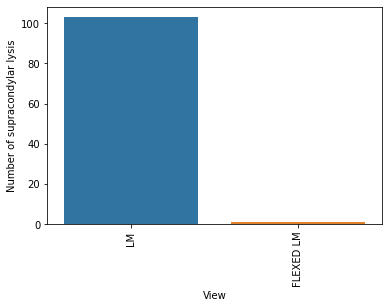

In [14]:
ax = sns.countplot(
    data=df.loc[
        (df["type"] == "Supracondylar lysis"),
    ],
    x="view",
)
_ = ax.set(xlabel="View", ylabel="Number of supracondylar lysis")
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [15]:
len(df.loc[(df["type"] == "Supracondylar lysis"), "image"].unique())

103